___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [61]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [62]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [63]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [64]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [65]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

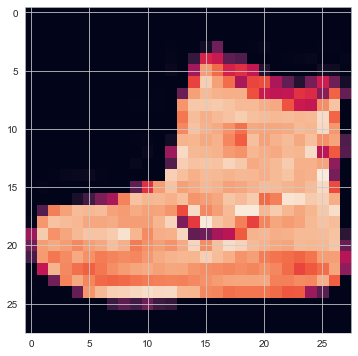

In [66]:
plt.imshow(X_train[0]);

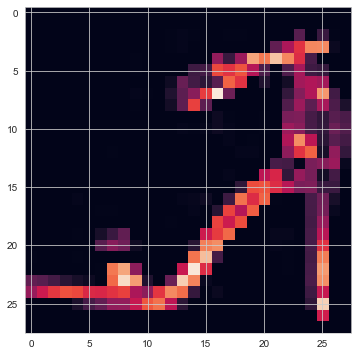

In [67]:
plt.imshow(X_train[8]);

In [68]:
y_train[0]

9

In [69]:
y_train.shape

(60000,)

In [71]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [70]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [34]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [72]:
y_train[0]

9

In [73]:
classes[int(y_train[0])]

'Ankle boot'

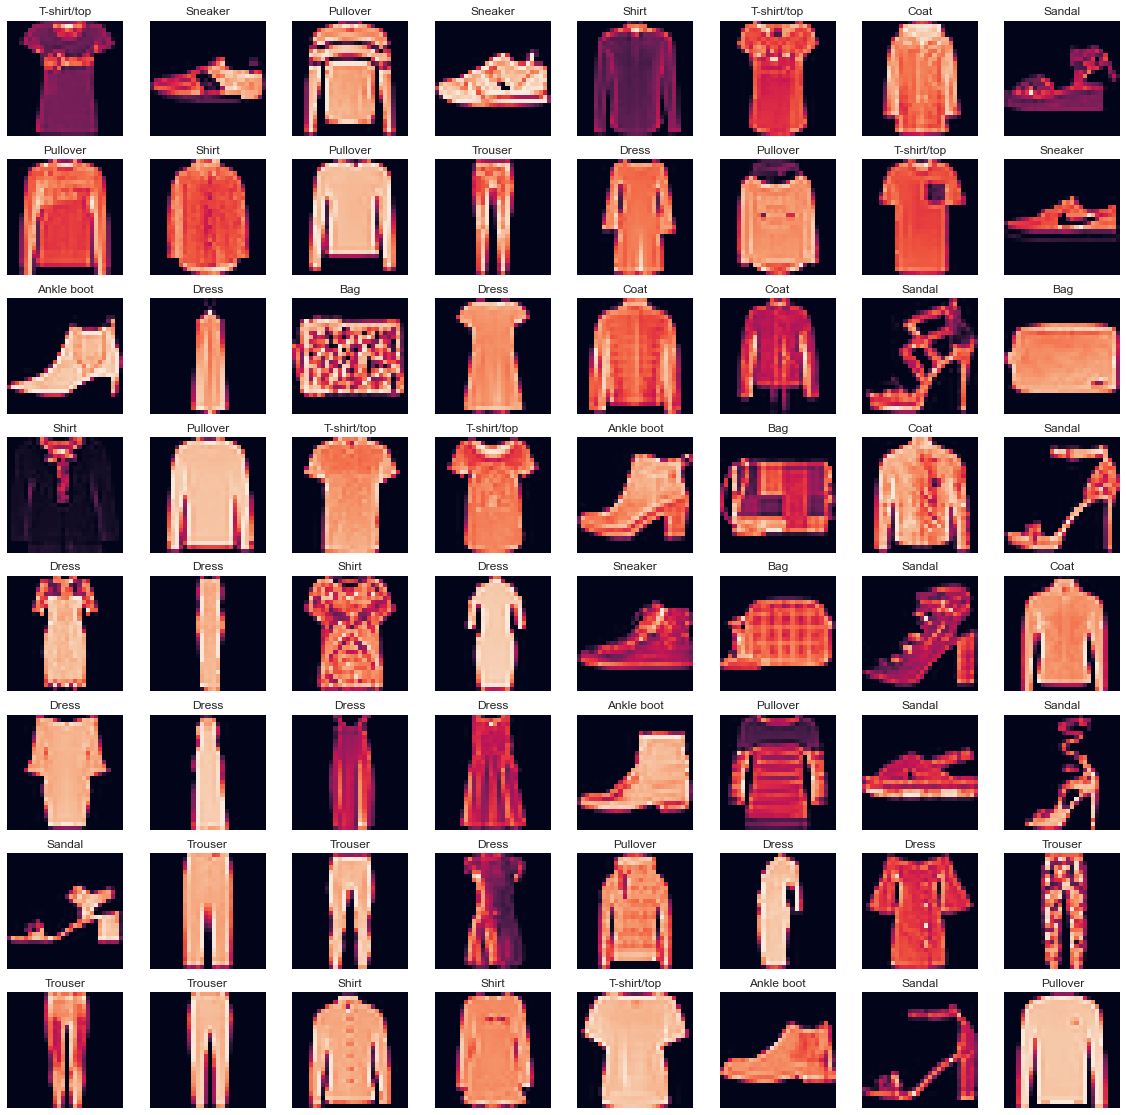

In [38]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [39]:
X_train[5].min()

0

In [40]:
X_train[5].max()

255

In [41]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [42]:
X_train[5].min()

0.0

In [43]:
X_train[5].max()

1.0

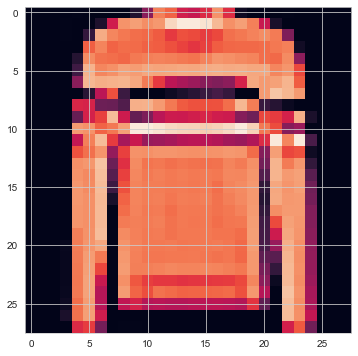

In [53]:
plt.imshow(X_train[5]);

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [74]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [81]:
x_train = X_train.reshape(x_train.shape[0],28,28,1)

In [82]:
x_test = X_test.reshape(10000,28,28,1)

In [83]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [84]:
from tensorflow.keras.utils import to_categorical

In [85]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [86]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [87]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [89]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 128)               2612864   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 2, restore_best_weights = True)

In [99]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3019 - accuracy: 0.8916 - val_loss: 0.3461 - val_accuracy: 0.8772
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2429 - accuracy: 0.9119 - val_loss: 0.3300 - val_accuracy: 0.8869
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2118 - accuracy: 0.9230 - val_loss: 0.3718 - val_accuracy: 0.8811
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1881 - accuracy: 0.9303 - val_loss: 0.3397 - val_accuracy: 0.8989
Epoch 5/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1688 - accuracy: 0.9378 - val_loss: 0.3759 - val_accuracy: 0.8915
Epoch 6/10
1875/1875 [==============================] - 65s 34ms/step - loss: 0.1544 - accuracy: 0.9433 - val_loss: 0.3871 - val_accuracy: 0.8943


In [100]:
model.metrics_names

['loss', 'accuracy']

In [101]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.302,0.892,0.346,0.877
1,0.243,0.912,0.330,0.887
2,0.212,0.923,0.372,0.881
3,0.188,0.930,0.340,0.899
4,0.169,0.938,0.376,0.891


**TASK 7: Plot values of metrics you used in your model.**

In [ ]:
# Grafiğin kolları bir yerden sonra ayrılmış bu nedenle overfitting durumu var! Dropout yapılabilir.

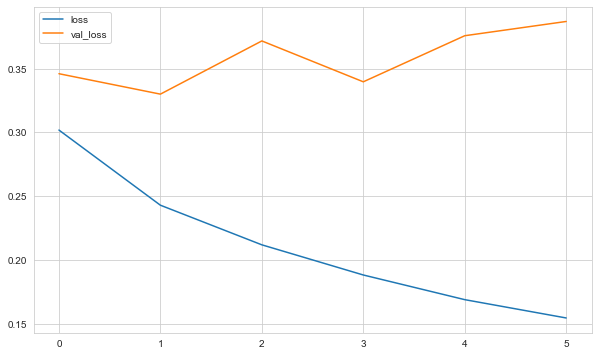

In [102]:
summary[["loss", "val_loss"]].plot();

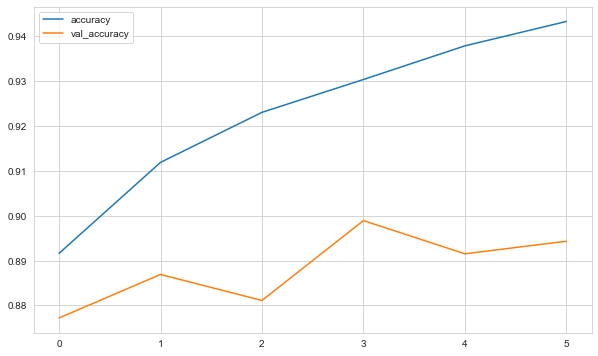

In [103]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [106]:
from sklearn.metrics import classification_report, confusion_matrix

In [107]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.3397 - accuracy: 0.8989


[0.33971327543258667, 0.8988999724388123]

In [108]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33971327543258667
Test accuracy: 0.8988999724388123


## Prediction

In [109]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [116]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.81      0.82      1000
           3       0.93      0.88      0.90      1000
           4       0.78      0.86      0.82      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.71      0.72      1000
           7       0.96      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [112]:
print(confusion_matrix(y_test, y_pred))

[[862   2  15  16   8   2  87   0   8   0]
 [  2 973   1   7  12   0   3   0   1   1]
 [ 20   0 811   5 104   0  60   0   0   0]
 [ 15   5  17 878  52   0  33   0   0   0]
 [  1   0  65  12 862   0  60   0   0   0]
 [  0   0   0   0   0 978   0  11   1  10]
 [125   1  63  26  69   1 707   0   8   0]
 [  0   0   0   0   0  12   0 968   0  20]
 [  1   0   2   2   1   1   9   2 981   1]
 [  0   0   0   0   0   3   1  27   0 969]]


<AxesSubplot:>

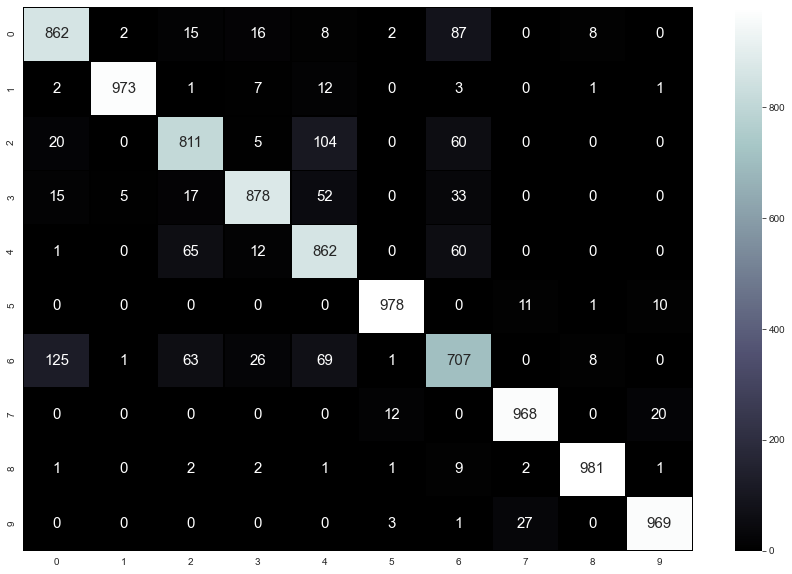

In [115]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="bone", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [ ]:
# Overfitting'i düzeltmek için dropout yaparız.

In [117]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 20412)             0         
                                                                 
 dense_3 (Dense)             (None, 128)               2612864   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                      

In [119]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 58s 31ms/step - loss: 1.9303 - accuracy: 0.5206 - val_loss: 0.7112 - val_accuracy: 0.6960
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.8485 - accuracy: 0.6674 - val_loss: 0.5210 - val_accuracy: 0.8102
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.6525 - accuracy: 0.7426 - val_loss: 0.4337 - val_accuracy: 0.8496
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.5188 - accuracy: 0.8011 - val_loss: 0.3925 - val_accuracy: 0.8593
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.4478 - accuracy: 0.8337 - val_loss: 0.3585 - val_accuracy: 0.8771
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3967 - accuracy: 0.8539 - val_loss: 0.3519 - val_accuracy: 0.8797
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3679 - accuracy: 0.8638 - val_loss: 0.3616 -

In [120]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.930,0.521,0.711,0.696
1,0.849,0.667,0.521,0.810
2,0.653,0.743,0.434,0.850
3,0.519,0.801,0.392,0.859
4,0.448,0.834,0.358,0.877


In [ ]:
# Dropout ile overfitting durumu önlenmiştir.

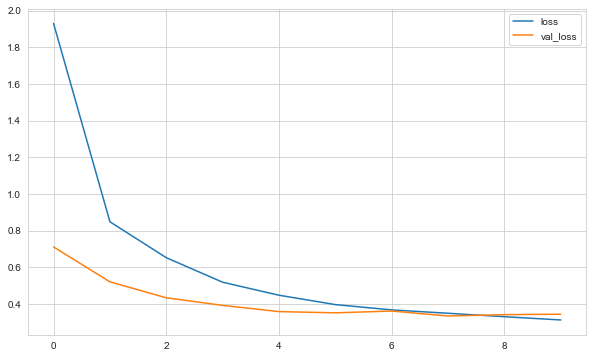

In [121]:
summary[["loss", "val_loss"]].plot();

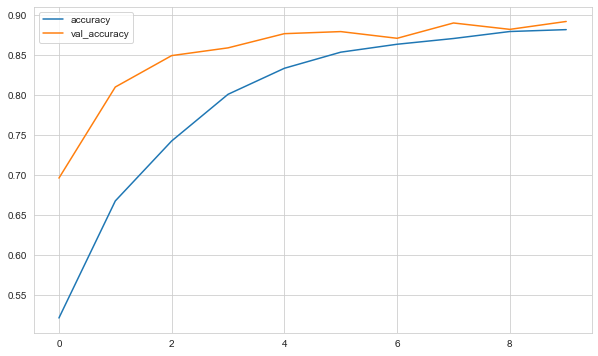

In [122]:
summary[["accuracy", "val_accuracy"]].plot();

In [123]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.3443 - accuracy: 0.8924


[0.3443309962749481, 0.8924000263214111]

In [124]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3443309962749481
Test accuracy: 0.8924000263214111


In [125]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [127]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       1.00      0.97      0.98      1000
           2       0.79      0.80      0.80      1000
           3       0.90      0.90      0.90      1000
           4       0.76      0.82      0.79      1000
           5       0.98      0.99      0.98      1000
           6       0.72      0.70      0.71      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.99      0.95      0.97      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<AxesSubplot:>

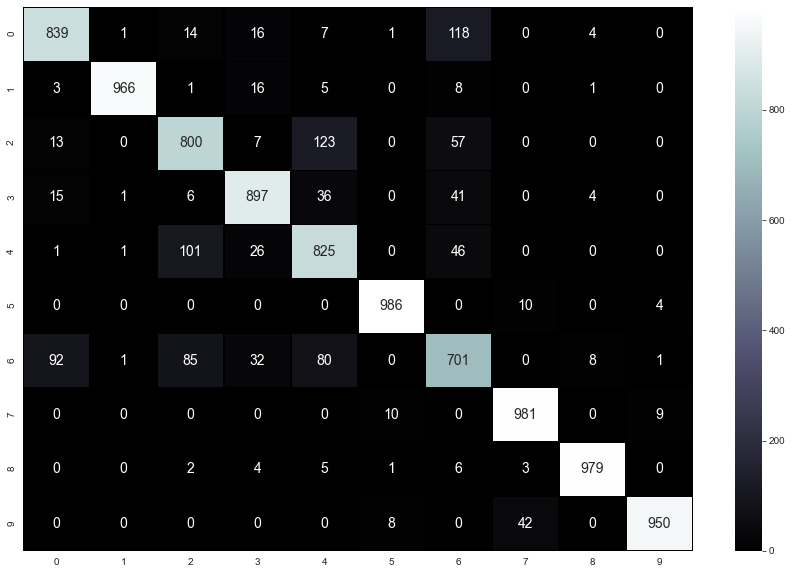

In [130]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="bone", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___